<h2>New Coders Survey Market Research<h2>

Our goal in this project is to find out the two best markets to advertise an e-learning product that offers courses on programming

To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result. 

freeCodeCamp's 2017 New Coder Survey is a good free resource for relevant data. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular [Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis. 

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Below, we'll do a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file stored in the clean-data folder of the repository we just mentioned. We'll read in the file using the direct link [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv).

<h3>Exploring the Data<h3>

In [81]:
import pandas as pd
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
survey = pd.read_csv(direct_link, low_memory=False)

#Get data structure
num_rows = survey.shape[0]
num_cols = survey.shape[1]
col_data_types = survey.dtypes
print(col_data_types)
print(num_rows, num_cols)

#Explore first 5 rows
survey.head(5)

Age                    float64
AttendedBootcamp       float64
BootcampFinish         float64
BootcampLoanYesNo      float64
BootcampName            object
                        ...   
YouTubeMIT             float64
YouTubeMozillaHacks    float64
YouTubeOther            object
YouTubeSimplilearn     float64
YouTubeTheNewBoston    float64
Length: 136, dtype: object
18175 136


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are many null values. We will address these depending on which columns we end up using after digging into the data a bit more.

<h3>Checking for Sample Representativity<h3>

As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

1) Where are these new coders located.
2) What locations have the greatest densities of new coders.
3) How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [82]:
survey["JobRoleInterest"].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

The information in the table above is quite granular, but from a quick scan it looks like:

• A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development). <br>
• A few people are interested in mobile development.<br>
• A few people are interested in domains other than web and mobile development.<br>

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

• Split each string in the `JobRoleInterest` column to find the number of options for each participant.<br>
• We'll first drop the null values because we can't split Nan values.<br>
• Generate a frequency table for the variable describing the number of options.<br>


In [83]:
interest_no_null = survey["JobRoleInterest"].dropna()
split_interest = interest_no_null.str.split(",")

#Frequency table to show number of people by number of topics of interest
topic_count = split_interest.apply(lambda x: len(x)) #x is list of job options here
topic_count.value_counts(normalize=True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

<h3>Web vs. Mobile<h3>

It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.


True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


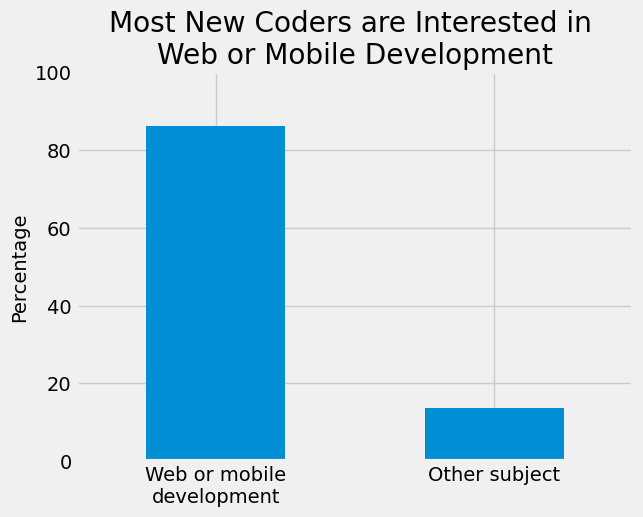

In [84]:
#Generate a frequency table
web_or_mobile = interest_no_null.str.contains(
    "Web Developer|Mobile Developer") #returns a boolean array with counts

freq_table = web_or_mobile.value_counts(normalize=True)*100
print(freq_table)

#Graph of the above table
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
freq_table.plot.bar()
plt.title("Most New Coders are Interested in \nWeb or Mobile Development")
plt.ylabel("Percentage")
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'], rotation=0)
plt.ylim(0,100)
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

<h3>Finding the Best Markets<h3>

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

• Where are these new coders located.<br>
• What are the locations with the greatest number of new coders.<br>
• How much money new coders are willing to spend on learning.<br>

In [85]:
#drop all the rows where participants didn't answer what role they are interested in
survey_good = survey[survey["JobRoleInterest"].notnull()]
survey_good = survey_good.copy()

#Create frequency table for CountryLive column
absolute_freq = survey_good["CountryLive"].value_counts()
relative_freq = survey_good["CountryLive"].value_counts(normalize=True)*100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {"Absolute Frequency": absolute_freq,
                    "Percentage": relative_freq})

,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Liberia,1,0.014624
Papua New Guinea,1,0.014624
Guadeloupe,1,0.014624
Gibraltar,1,0.014624


45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is unlikely to be profitable for us.

<h3>Spending Money for Learning<h3>

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

• These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.<br>
• Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.<br>

Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the `MoneyForLearning` column by the `MonthsProgramming` column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the `MonthsProgramming` column.

In [86]:
# Replace 0s with 1s to avoid division by 0
survey_good["MonthsProgramming"].replace(0,1,inplace=True)

#Create new column for money spent per month for each student
survey_good["money_per_month"] = survey_good["MoneyForLearning"]/survey_good["MonthsProgramming"]
survey_good["money_per_month"].isnull().sum()

675

In [87]:
#keep only the rows that don't have null values for the money_per_month column.
survey_good = survey_good[survey_good["money_per_month"].notnull()]

# Remove the rows with null values in 'CountryLive'
survey_good = survey_good[survey_good["CountryLive"].notnull()]

#Create frequency table to see if we still have sufficient data
survey_good["CountryLive"].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

This should be enough, so let's compute the average value spent per month in each country by a student. We'll compute the average using the mean.

In [88]:
#Mean sum of money spent by students each month
country_group = survey_good.groupby("CountryLive")["money_per_month"].mean()
country_mean = country_group[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
print(country_mean)

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64


If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India. Therefore, the results for the United Kingdom and Canada are a bit surprising relative to the values we see for India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

<h3>Accounting for Extreme Outliers<h3>

Let's use box plots to visualize the distribution of the "money_per_month" variable for each country.

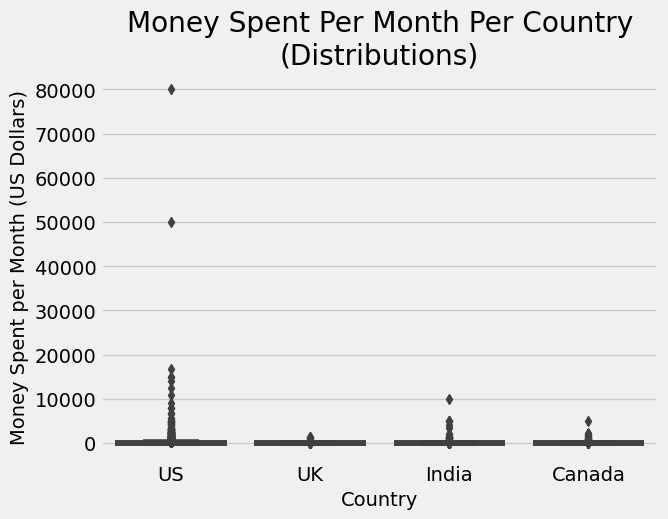

In [89]:
#Isolate data for the relevant countries
relevant_countries = survey_good[survey_good["CountryLive"].str.contains(
    "United States of America|India|United Kingdom|Canada")]

#Box plots to visualize the distribution
import seaborn as sns
sns.boxplot(y="money_per_month", x="CountryLive", data=relevant_countries)
plt.title("Money Spent Per Month Per Country\n(Distributions)")
plt.ylabel("Money Spent per Month (US Dollars)")
plt.xlabel("Country")
plt.xticks(range(4),["US","UK","India","Canada"]) #avoid tick label overlapping text
plt.show()


It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two people spend more than \\$50k per month for learning. This isn't impossible, but seems very unlikely, so we will remove every value that goes over \\$20k, and then take a second look for remaining outliers. 

In [90]:
# Isolate for new coders who spend less than $20k per month
survey_good = survey_good[survey_good['money_per_month']<20000]

# Recompute mean sum of money spent by students each month & re
country_group = survey_good.groupby("CountryLive")["money_per_month"].mean()
country_mean = country_group[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
print(country_mean)

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64


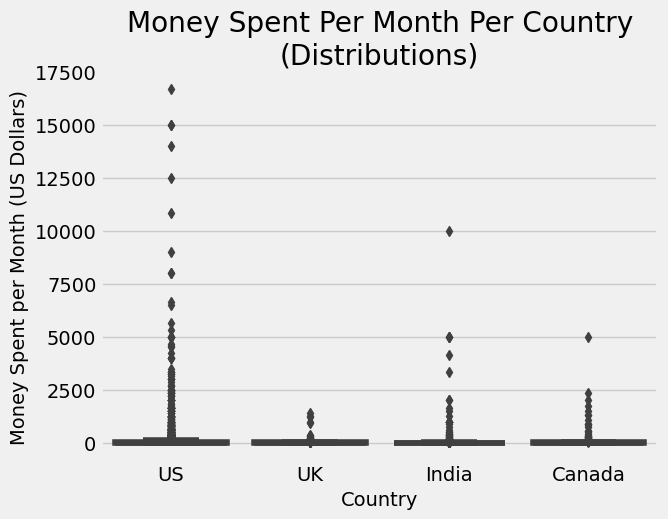

In [91]:
# Box plots to visualize distributions

relevant_countries = survey_good[survey_good["CountryLive"].str.contains(
    "United States of America|India|United Kingdom|Canada")]
sns.boxplot(y="money_per_month", x="CountryLive", data=relevant_countries)
plt.title("Money Spent Per Month Per Country\n(Distributions)")
plt.ylabel("Money Spent per Month (US Dollars)")
plt.xlabel("Country")
plt.xticks(range(4),["US","UK","India","Canada"]) #avoid tick label overlapping text
plt.show()

We see a few outliers for India & Canada, as well as a few more outliers for the US. Let's explore them. For India there are a few values over \\$2500 per month. While for Canada there's one person who spends roughly \\$5000 per month. Let's take a closer look at these data points to determine whether they are useful data. 

In [92]:
canada_outliers = relevant_countries[(relevant_countries["CountryLive"]=="Canada") 
                                     & (relevant_countries["money_per_month"]>4500)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [93]:
canada_outliers["MonthsProgramming"]

13659    2.0
Name: MonthsProgramming, dtype: float64

This Canadian participant had been programming for two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then perhaps did not spend anything for the next couple of months after the survey. We will remove his data. 

In [94]:
relevant_countries = relevant_countries.drop(canada_outliers.index)

Next we'll look at Indian outliers as well. 

In [95]:
india_outliers = relevant_countries[(relevant_countries["CountryLive"]=="India") 
                                     & (relevant_countries["money_per_month"]>2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


None of the above survey participants attended a bootcamp, so it seems odd they would spend such large monthly amounts on learning. The survey question asked was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?" Perhaps, there's a possibility they mistakenly included university tuition. In any case, it's safer to remove these rows. 

In [96]:
relevant_countries = relevant_countries.drop(india_outliers.index)

Finally, let's take a second look at US outliers.

In [97]:
us_outliers = relevant_countries[(relevant_countries["CountryLive"]=="United States of America") 
                                     & (relevant_countries["money_per_month"]>6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of these 11 outliers, 6 people attended bootcamps, which justifies the large sum spent on learning. For the other 5, it's difficult to figure out from the dataset where they could have spent such a large sum on learning, so will remove them from our sample. Additionally, 8 people were programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (as they probably didn't spend anything for the next couple of months after the survey). So, we will remove them as well.

In [98]:
relevant_countries = relevant_countries.drop(us_outliers.index)

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64


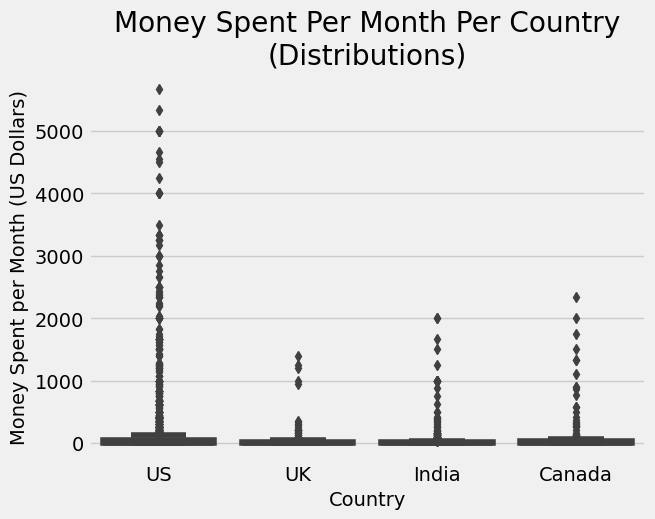

In [100]:
# Recompute mean sum of money spent by students each month, now that extreme outliers are removed
print(relevant_countries.groupby("CountryLive")["money_per_month"].mean())

sns.boxplot(y="money_per_month", x="CountryLive", data=relevant_countries)
plt.title("Money Spent Per Month Per Country\n(Distributions)")
plt.ylabel("Money Spent per Month (US Dollars)")
plt.xlabel("Country")
plt.xticks(range(4),["US","UK","India","Canada"]) #avoid tick label overlapping text
plt.show()

<h3>Choosing the Two Best Markets<h3>

Based on the above, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly $143). The UK is the least potentially lucarative option and can be eliminated. 

Let's take a look at one other view of the data before deciding whether Canada or India is the second best option. 

In [101]:
relevant_countries["CountryLive"].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

<h3>Advertising Campaign Recommendations<h3>

Below are our potential options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:<br>
•60% for the US, 25% for India, 15% for Canada.<br>
•50% for the US, 30% for India, 20% for Canada; etc.<br>
<br>
Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
•70% for the US, and 30% for India.<br>
•65% for the US, and 35% for Canada; etc.<br>
<br>
Advertise only in the US.